# Simple Linear Regression

Simple Linear Regression: It is a Regression Model that estimates the relationship between the independent variable and the dependent variable using a straight line [y = mx + c], where both the variables should be quantitative. The model with higher R-2 and less MSE is a good model fit.  

#### The steps involved are:
1. Importing the dataset.

2. Visualising the Data

3. Data Cleaning

4. Build the Model and Train it

5. Make Predictions on Unseen Data

In [11]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

In [54]:
# Read data
delivery_timedf= pd.read_csv('delivery_time.csv')
delivery_timedf.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [55]:
delivery_timedf=delivery_timedf.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1)
delivery_timedf

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [16]:
delivery_timedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [17]:
delivery_timedf.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [18]:
delivery_timedf.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

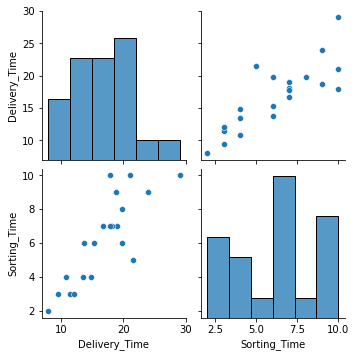

In [19]:
sns.pairplot(delivery_timedf)

<AxesSubplot:xlabel='Delivery_Time'>

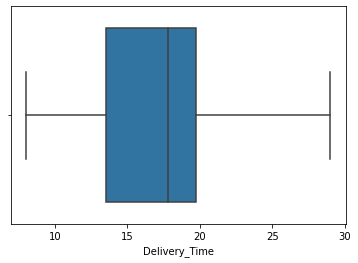

In [22]:
sns.boxplot(x=delivery_timedf['Delivery_Time'])

<AxesSubplot:xlabel='Sorting_Time', ylabel='Count'>

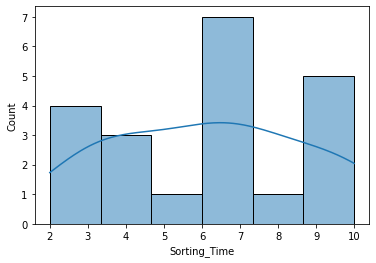

In [23]:
sns.histplot(data=delivery_timedf.Sorting_Time,kde=True)

<AxesSubplot:xlabel='Delivery_Time', ylabel='Count'>

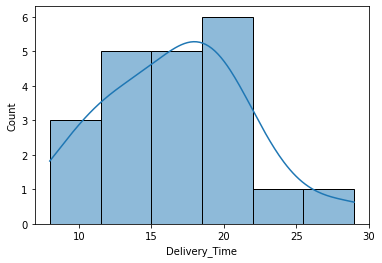

In [24]:
sns.histplot(data=delivery_timedf.Delivery_Time,kde=True)

<AxesSubplot:xlabel='Sorting_Time'>

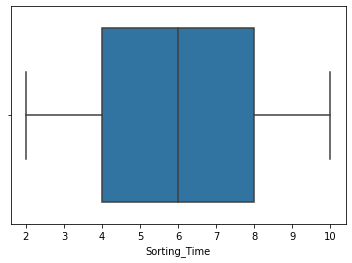

In [25]:
sns.boxplot(x=delivery_timedf.Sorting_Time)

In [26]:
corre= delivery_timedf.corr()
corre

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<AxesSubplot:>

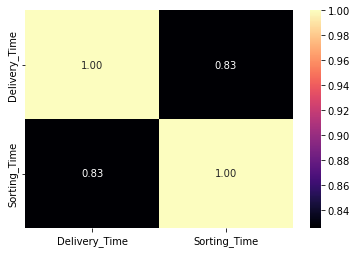

In [27]:
sns.heatmap(corre,cmap='magma',annot=True,fmt='.2f')

In [28]:
model= smf.ols('Sorting_Time~Delivery_Time',data=delivery_timedf).fit()
model.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sorting_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 11 Jan 2022   Prob (F-statistic):           3.98e-06
Time:                        14:30:34   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7567      1.134     -0.667      0.513      -3.130       1.617
Delivery_Time     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model.params

Intercept       -0.756673
Delivery_Time    0.413744
dtype: float64

In [30]:
model.resid

0     2.068057
1    -0.828866
2    -1.414763
3    -0.173174
4    -1.241892
5     0.405709
6    -0.104456
7    -0.173891
8     3.350662
9     1.998980
10    0.552137
11    0.308929
12    0.855430
13   -1.001378
14   -1.220662
15   -1.399832
16    1.067698
17    0.263776
18   -0.553276
19    0.379624
20   -3.138815
dtype: float64

In [31]:
model.resid_pearson

array([ 1.40674689, -0.56381619, -0.9623592 , -0.11779731, -0.8447675 ,
        0.27597371, -0.07105342, -0.1182853 ,  2.27920872,  1.35975901,
        0.37557826,  0.21014188,  0.58188575, -0.6811639 , -0.83032673,
       -0.95220243,  0.72627659,  0.17942755, -0.37635266,  0.25823056,
       -2.13510428])

In [32]:
model.conf_int(0.05)

,0,1
Intercept,-3.130058,1.616712
Delivery_Time,0.278169,0.549318


In [34]:
#making prediction
pred= model.predict(delivery_timedf.Delivery_Time)
pred

0      7.931943
1      4.828866
2      7.414763
3      9.173174
4     11.241892
5      5.594291
6      7.104456
7      3.173891
8      6.649338
9      7.001020
10     7.447863
11     3.691071
12     6.144570
13     4.001378
14     4.220662
15     5.399832
16     4.932302
17     6.736224
18     2.553276
19     6.620376
20     8.138815
dtype: float64

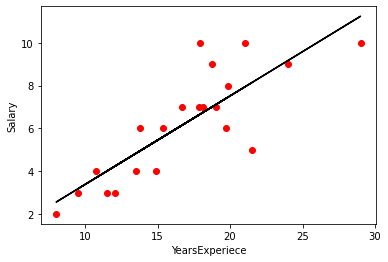

In [35]:
plt.scatter(x=delivery_timedf.Delivery_Time,y=delivery_timedf.Sorting_Time,color='red')
plt.plot(delivery_timedf.Delivery_Time,pred,color='black')
plt.xlabel('Delivery time')
plt.ylabel('Sorting time')
plt.show()

In [36]:
rmse1=np.sqrt(mean_squared_error(delivery_timedf.Sorting_Time, pred))
rmse1

1.3983430567957227

In [37]:
#By log Prediction
model2= smf.ols('Sorting_Time~np.log(Delivery_Time)',data=delivery_timedf).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sorting_Time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Tue, 11 Jan 2022   Prob (F-statistic):           1.59e-06
Time:                        14:36:04   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(Delivery_Time)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
model2.params

Intercept               -12.499233
np.log(Delivery_Time)     6.735548
dtype: float64

In [39]:
pred2= model2.predict(pd.DataFrame(delivery_timedf.Delivery_Time))

In [40]:
rmse_log= np.sqrt(mean_squared_error(delivery_timedf.Sorting_Time, pred2))
rmse_log

1.3337477286899515

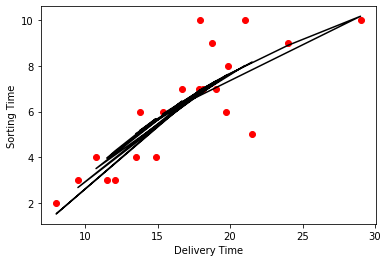

In [42]:
plt.scatter(x=delivery_timedf.Delivery_Time,y=delivery_timedf.Sorting_Time,color='red')
plt.plot(delivery_timedf.Delivery_Time,pred2,color='black')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()

Text(0, 0.5, 'Actual')

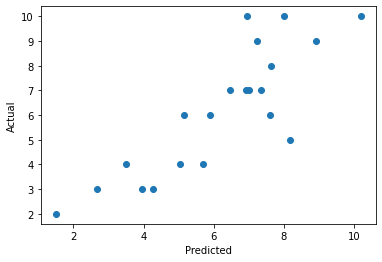

In [52]:
plt.scatter(x=pred2,y=delivery_timedf.Sorting_Time)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [43]:
# log of dependent variables
model3= smf.ols('np.log(Sorting_Time)~Delivery_Time',data=delivery_timedf).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Sorting_Time)   R-squared:                       0.695
Model:                              OLS   Adj. R-squared:                  0.679
Method:                   Least Squares   F-statistic:                     43.39
Date:                  Tue, 11 Jan 2022   Prob (F-statistic):           2.64e-06
Time:                          14:41:37   Log-Likelihood:               -0.85600
No. Observations:                    21   AIC:                             5.712
Df Residuals:                        19   BIC:                             7.801
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4372      0.204      2.139      0.046       0.009       0.865
Delivery_Time     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
model3.params

Intercept        0.437237
Delivery_Time    0.076901
dtype: float64

In [45]:
pred3= model3.predict(pd.DataFrame(delivery_timedf.Delivery_Time))

In [46]:
pred_3=np.exp(pred3)  # as we have used log(AT) in preparing model so we need to convert it back
pred_3

0      7.784605
1      4.372758
2      7.071145
3      9.804581
4     14.401789
5      5.041280
6      6.674852
7      3.214886
8      6.133444
9      6.547752
10     7.114781
11     3.539259
12     5.584181
13     3.749389
14     3.905361
15     4.862325
16     4.457638
17     6.233298
18     2.864635
19     6.100516
20     8.089754
dtype: float64

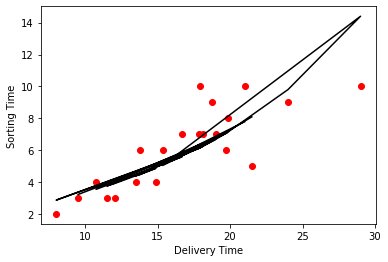

In [47]:
plt.scatter(x=delivery_timedf.Delivery_Time,y=delivery_timedf.Sorting_Time,color='red')
plt.plot(delivery_timedf.Delivery_Time,pred_3,color='black')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()

In [48]:
rmse_log2= np.sqrt(mean_squared_error(delivery_timedf.Sorting_Time, pred_3))
rmse_log2

1.7921450016869793

In [49]:
sorting_resid=model3.resid_pearson
sorting_resid

array([ 0.94514898, -0.33626175, -0.61992804, -0.32314918, -1.3766316 ,
        0.65705128,  0.17950335, -0.26108323,  1.84483896,  1.20051932,
        0.44256592,  0.46185032,  0.85281972, -0.84152838, -0.99534634,
       -0.7367689 ,  1.12140739,  0.43780144, -1.35597416,  0.51906376,
       -1.81589886])

Text(0, 0.5, 'Standardized Residual')

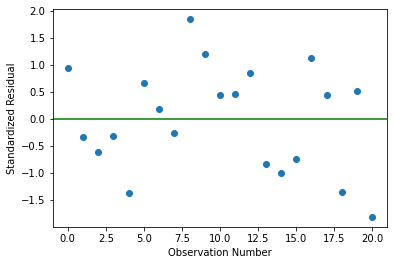

In [50]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

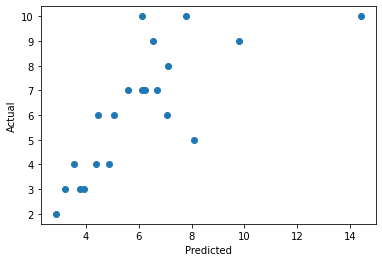

In [51]:
plt.scatter(x=pred_3,y=delivery_timedf.Sorting_Time)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [56]:
delivery_timedf['Delivery_Time_sq']=delivery_timedf.Delivery_Time*delivery_timedf.Delivery_Time
delivery_timedf

,Delivery_Time,Sorting_Time,Delivery_Time_sq
0,21.00,10,441.0000
1,13.50,4,182.2500
2,19.75,6,390.0625
3,24.00,9,576.0000
4,29.00,10,841.0000
5,15.35,6,235.6225
6,19.00,7,361.0000
7,9.50,3,90.2500
8,17.90,10,320.4100
9,18.75,9,351.5625


In [57]:
model4= smf.ols('np.log(Sorting_Time)~Delivery_Time+Delivery_Time_sq',data=delivery_timedf).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Sorting_Time)   R-squared:                       0.794
Model:                              OLS   Adj. R-squared:                  0.771
Method:                   Least Squares   F-statistic:                     34.62
Date:                  Tue, 11 Jan 2022   Prob (F-statistic):           6.77e-07
Time:                          14:49:44   Log-Likelihood:                 3.2337
No. Observations:                    21   AIC:                           -0.4673
Df Residuals:                        18   BIC:                             2.666
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.7780      0.450     -1.730      0.101      -1.723       0.167
Delivery_Time        0.2272      0.052      4.346      0.000       0.117       0.337
Delivery_Time_sq    -0.0043      0.001     -2.928      0.009      -0.007      -0.001
==============================================================================
Omnibus:                        1.853   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                0.957
Skew:                          -0.521   Prob(JB):                        0.620
Kurtosis:                       3.100   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
model4.params

Intercept          -0.778048
Delivery_Time       0.227222
Delivery_Time_sq   -0.004271
dtype: float64

In [59]:
pred_quad = model4.predict(delivery_timedf)

In [60]:
pred4=np.exp(pred_quad)  # as we have used log(AT) in preparing model so we need to convert it back
pred4

0     8.250905
1     4.531944
2     7.720077
3     9.165723
4     9.206382
5     5.493602
6     7.370749
7     2.705128
8     6.827202
9     7.250110
10    7.756102
11    3.225473
12    6.195767
13    3.561679
14    3.809137
15    5.245998
16    4.659292
17    6.933311
18    2.152041
19    6.791625
20    8.441717
dtype: float64

In [61]:
rmse_quad = np.sqrt(mean_squared_error(delivery_timedf.Sorting_Time, pred4))
rmse_quad 

1.347141980025572

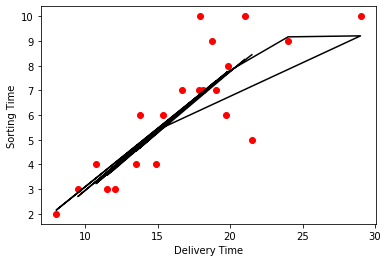

In [62]:
plt.scatter(x=delivery_timedf.Delivery_Time,y=delivery_timedf.Sorting_Time,color='red')
plt.plot(delivery_timedf.Delivery_Time,pred4,color='black')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()

Text(0, 0.5, 'Standardized Residual')

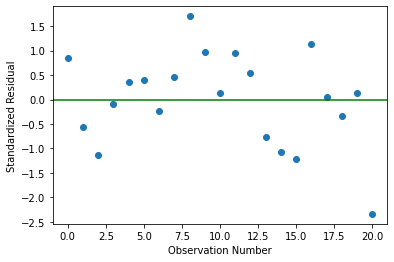

In [63]:
plt.plot(model4.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

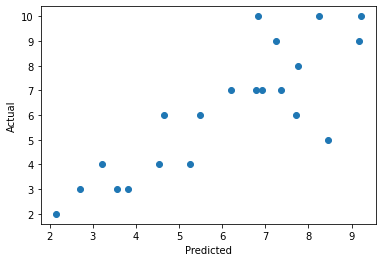

In [68]:
plt.scatter(x=pred4,y=delivery_timedf.Sorting_Time)
plt.xlabel("Predicted")
plt.ylabel("Actual")

(array([1., 0., 1., 3., 2., 3., 5., 2., 3., 1.]),
 array([-2.33754663, -1.93344817, -1.52934971, -1.12525125, -0.72115278,
        -0.31705432,  0.08704414,  0.4911426 ,  0.89524106,  1.29933953,
         1.70343799]),
 <BarContainer object of 10 artists>)

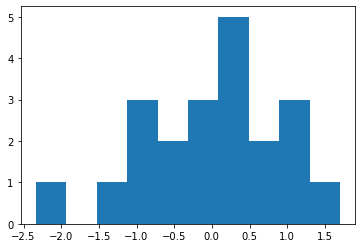

In [67]:
plt.hist(model4.resid_pearson)

In [66]:
data = {"MODEL":pd.Series(["rmse1","rmse_log","rmse_log2","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse1,rmse_log,rmse_log2,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model4.rsquared])}
table=pd.DataFrame(data)
table

,MODEL,RMSE_Values,Rsquare
0,rmse1,1.398343,0.682271
1,rmse_log,1.333748,0.710948
2,rmse_log2,1.792145,0.695443
3,rmse_quad,1.347142,0.793693


We will take Model which RMSE value is very less and Rsquare value is high, our model4 RMSE value is 1.34 and Rsquare is 79%, we are taking this model as Rsquare is high, so the best fit model is model4.  

# Simple Linear Regression Scikit-learn

In [12]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocessing

In [17]:
dataset= pd.read_csv('delivery_time.csv')

In [38]:
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [39]:
x= dataset['Delivery Time'].values.reshape(-1,1)
y= dataset['Sorting Time'].values.reshape(-1,1)

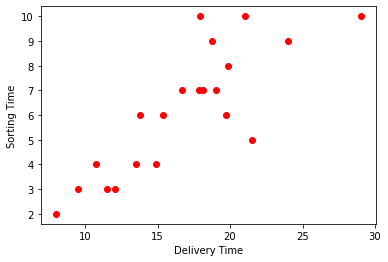

In [46]:
plt.scatter(x,y,color='red')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()

In [26]:
#std = preprocessing.StandardScaler()
#std.fit(x)
#X_std = std.transform(x)

In [29]:
#train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3,random_state=0)

In [30]:
#print(train_x.shape[0],train_y.shape[0])

14 14


In [40]:
#Preparing Model
lr_sk= LinearRegression()
lr_sk.fit(x,y)

LinearRegression()

In [41]:
pred_y= lr_sk.predict(x)

In [42]:
MSE= metrics.mean_squared_error(y,pred_y)
MSE

1.9553633044888055

In [44]:
accuracy= lr_sk.score(x,y)
accuracy= round(accuracy*100)
accuracy

68

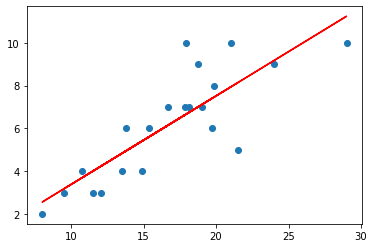

In [45]:
plt.scatter(x,y)
plt.plot(x,pred_y,color='red')
plt.show()

the accuracy of the model with this dataset 68%,  This is our best fit line through the sklearn learn library and we got 68% of accuracy 